## Recurrent neural Network

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part1 - Data Processing

### Import the Training set

In [2]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = data_train.iloc[:, 1:2].values

### Let Apply Feature Scaling by using MinMaxScale

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Let create data structure with 60 timestep and 1 output

In [5]:
X_train = []
y_train = []
for i in range (60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Let Reshape

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part2 - Building The Recurrent Neural Network


#### Let import the keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

## Initialising the rnn

In [11]:
regressor = Sequential()

### Add the first LSTM layers and some dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Add the second LSTM layers and some dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Add the third LSTM layers and some dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Add the fourth LSTM layers and some dropout regularisation

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Add the output layers

In [17]:
regressor.add(Dense(units = 1))

### Compile the rnn

In [19]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Let fit RNN to the Training set

In [20]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0456
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0046
Epoch 13/100
38/38

### Let make a Prediction and Visualize it

##### Let getting the real stock of 2017

In [21]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

### Getting the Prediction Stocks price of 2017

In [25]:
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) -len(data_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
stock_price_predicted = regressor.predict(X_test)
stock_price_predicted = sc.inverse_transform(stock_price_predicted)

### Let Visualize the Result

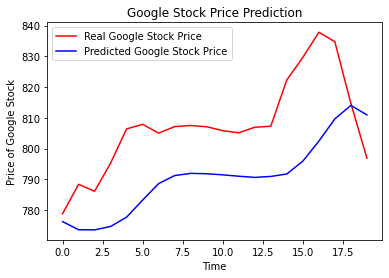

In [27]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(stock_price_predicted, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price of Google Stock")
plt.legend()
plt.show()

### RMSE

In [35]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, stock_price_predicted))

In [36]:
rmse

20.403014552676478